### KNN

In [1]:
import pandas as pd
import numpy as np
np.random.seed(5)

In [2]:
# 데이터 불러오기
train = pd.read_csv("../Data/baseketball_train.csv")
test = pd.read_csv("../Data/baseketball_test.csv")

In [3]:
train.head()

,Player,Pos,3P,TRB,BLK
0,Pau Gasol,C,0.9,7.8,1.1
1,Nicolas Batum,SG,1.8,6.2,0.4
2,Allen Crabbe,SG,1.7,2.9,0.3
3,Manu Ginobili,SG,1.3,2.3,0.2
4,Danny Green,SG,1.7,3.3,0.8


In [4]:
test.head()

,Player,Pos,3P,TRB,BLK
0,Avery Bradley,SG,2.0,6.1,0.2
1,Zach LaVine,SG,2.6,3.4,0.2
2,Troy Daniels,SG,2.1,1.5,0.1
3,Will Barton,SG,1.5,4.3,0.5
4,Willie Cauley-Stein,C,0.0,4.5,0.6


In [5]:
# 전체 갯수 확인하기
print(train.shape)
print(test.shape)

(80, 5)
(20, 5)


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  80 non-null     object 
 1   Pos     80 non-null     object 
 2   3P      80 non-null     float64
 3   TRB     80 non-null     float64
 4   BLK     80 non-null     float64
dtypes: float64(3), object(2)
memory usage: 3.3+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Player  20 non-null     object 
 1   Pos     20 non-null     object 
 2   3P      20 non-null     float64
 3   TRB     20 non-null     float64
 4   BLK     20 non-null     float64
dtypes: float64(3), object(2)
memory usage: 932.0+ bytes


In [9]:
# train의 NaN
train.isna().sum()

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64

In [10]:
# test의 NaN
test.isnull().sum()

Player    0
Pos       0
3P        0
TRB       0
BLK       0
dtype: int64

In [11]:
test.Player.isna().sum()

0

In [16]:
test.loc[:,"Player" : "TRB"].isna().sum()

Player    0
Pos       0
3P        0
TRB       0
dtype: int64

### 최적의 k찾기(교차검증-cross validation)

In [17]:
# KNN
from sklearn.neighbors import KNeighborsClassifier

In [18]:
# 교차검증
from sklearn.model_selection import cross_val_score

In [25]:
# 최적의 k를 찾기위해 교차검증을 수행할 k의 범위를 3부터 학습데이터의 절반까지 지정
max_k_range = train.shape[0] // 2
max_k_range

40

In [28]:
# 최적의 k를 찾기 위한 범위 확인 : [3,5,7,9,....,39]
k_list = [i for i in range(3, max_k_range+1, 2)]
k_list
# list(range(3, max_k_range+1, 2))


[3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35, 37, 39]

In [31]:
# Feature와 Target 구분
train_data = train[['3P','BLK','TRB']]
train_target = train['Pos']

print(train_data.head())
print(train_target.head())

    3P  BLK  TRB
0  0.9  1.1  7.8
1  1.8  0.4  6.2
2  1.7  0.3  2.9
3  1.3  0.2  2.3
4  1.7  0.8  3.3
0     C
1    SG
2    SG
3    SG
4    SG
Name: Pos, dtype: object


In [34]:
# 교차검증(10-fold)을 각 k를 대상으로 수행해 검증 결과를 저장 
cross_validation_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(
        knn,
        train_data,
        train_target,
        cv=10, # cross validation : 9개는 학습데이터, 1개는 검증데이터 
        scoring='accuracy'
    )
    print(scores)
    cross_validation_scores.append(scores.mean())


[0.875 0.875 0.875 0.875 0.875 0.875 0.75  1.    1.    0.75 ]
[0.875 0.75  0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    1.    0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    1.    0.875]
[0.875 0.625 0.875 0.875 1.    0.875 0.75  1.    0.875 0.875]
[0.875 0

In [35]:
cross_validation_scores

[0.875,
 0.9,
 0.875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.8875,
 0.875,
 0.875,
 0.8625,
 0.85,
 0.8375,
 0.8375]

In [36]:
import matplotlib.pyplot as plt

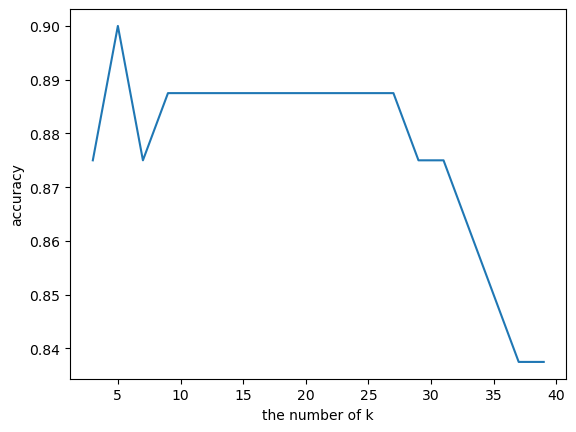

In [37]:
# k의 정확도 시각화
plt.plot(
    k_list,
    cross_validation_scores
)

plt.xlabel("the number of k")
plt.ylabel('accuracy')
plt.show()

In [42]:
# 가장 예측율이 높은 k를 찾자!
cvs = cross_validation_scores
k = k_list[cvs.index(max(cvs))]
k

5

---
### 2개의 특징으로 예측하기 (3점슛, 블로킹)

In [43]:
knn = KNeighborsClassifier(n_neighbors=k)

In [44]:
# Train의 Feature
train_data = train[['3P', 'BLK']]

# Train의 Target
train_target = train['Pos']

In [45]:
# 학습 시키기
knn.fit(train_data, train_target)

KNeighborsClassifier()

In [46]:
test_data = test[['3P', 'BLK']]
test_target = test['Pos']

In [47]:
print("Train :", knn.score(train_data, train_target))
print("Test  :", knn.score(test_data, test_target))

Train : 0.9625
Test  : 0.95


---
### 3개의 특징으로 예측하기 (3점슛, 블로킹, 리바운드)

In [48]:
# Train의 Feature
train_data = train[['3P', 'BLK', 'TRB']]

# Train의 Target
train_target = train['Pos']

In [49]:
# 학습 시키기
knn.fit(train_data, train_target)

KNeighborsClassifier()

In [50]:
test_data = test[['3P', 'BLK', 'TRB']]
test_target = test['Pos']

In [51]:
print("Train :", knn.score(train_data, train_target))
print("Test  :", knn.score(test_data, test_target))

Train : 0.925
Test  : 0.9


---
### 학습한 AI 사용해 보기
어떤 선수의 점수 :    
- 3P : 3.4
- BLK : 0.5
- TRB : 3.7

In [54]:
# 점수 입력
data = pd.DataFrame(
    {
        '3P'  : [3.4],
        'BLK' : [0.5],
        'TRB' : [3.7]
    }
)
data

,3P,BLK,TRB
0,3.4,0.5,3.7


In [56]:
# 예측
pred = knn.predict(data)
print(f"추천하는 포지션은 {pred[0]} 입니다.")

추천하는 포지션은 SG 입니다.


### AI 저장하기

In [57]:
import joblib

In [58]:
joblib.dump(knn, "../Data/knn_basketball.h5")

['../Data/knn_basketball.h5']